In [41]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Mid_term")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##1. Introduction
The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of deep learning models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not. 



##2. Data analysis
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

We first load the loan data. Please print out the shape of 'loan_data'.  

In [43]:
#Load dataset
loan_data=pd.read_csv('/content/drive/MyDrive/Mid_term/loan - loan (4).csv')
# start your code here
n_record,n_category=loan_data.shape
# end your code here
print('There are %d records.' % n_record)
print('Every record has %d categories' % n_category)

There are 714 records.
Every record has 13 categories


Expected output: 

```
There are 614 records.
Every record has 13 categories
```

Now, let's print the 1st 20 records of the loan data, and have a better understanding of what the data look like.

In [44]:
loan_data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [45]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            714 non-null    object 
 1   Gender             699 non-null    object 
 2   Married            711 non-null    object 
 3   Dependents         697 non-null    object 
 4   Education          714 non-null    object 
 5   Self_Employed      675 non-null    object 
 6   ApplicantIncome    714 non-null    int64  
 7   CoapplicantIncome  714 non-null    float64
 8   LoanAmount         687 non-null    float64
 9   Loan_Amount_Term   697 non-null    float64
 10  Credit_History     656 non-null    float64
 11  Property_Area      714 non-null    object 
 12  Loan_Status        714 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 72.6+ KB


We can see that there are 13 categories in the records. Please pay close attention to the data. Sometimes, there are `NaN` values. We will need to fix this later. Right now, Let's analyze the categories one by one. 

###2.1 Loan ID
Loan ID is our 1st category. However, this category has no relevance to the approval status. Therefore, we will drop this category. Please print out the first 5 records of the 'loan_data' to make sure that the category 'Loan_ID' is dropped. Hint: check cells above to see how we print the first 20 records.

In [46]:
loan_data = loan_data.drop(['Loan_ID'], axis = 1)

#start your code here
loan_data.head(5)
# end your code here

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Expected output:
![alt text](https://drive.google.com/uc?id=1F8Lve6Wx6lYuoMPCNaq_cLEzT1dY9Z__)

### 2.2 Gender
We would like to know among all these 614 records, how many of them are male, how many of them are female, how many of them are null entries.

Male      569
Female    130
NaN        15
Name: Gender, dtype: int64


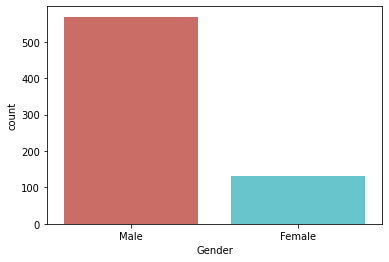

Percentage of Male: 79.69%
Percentage of Female: 18.21%
Percentage of missing value: 2.10%


In [47]:
gender_count=loan_data.Gender.value_counts(dropna=False) # count different values in 'Gender' category
print(gender_count)
sns.countplot(x="Gender", data=loan_data, palette="hls")
plt.show()

p_male=gender_count['Male']/n_record
p_female=gender_count['Female']/n_record
p_NaN=gender_count[-1]/n_record

print('Percentage of Male: {:.2f}%'.format(p_male*100))
print('Percentage of Female: {:.2f}%'.format(p_female*100))
print('Percentage of missing value: {:.2f}%'.format(p_NaN*100))



Conclusion: There are much more male applicants than female applicants. The missing value takes 2.12% of the records, a small portion of the whole records.

### 2.3 Married
Please follow the same idea in section 2.2 to analyze the category 'Married' and make a conclusion at the end of this section.

Yes    459
No     252
NaN      3
Name: Married, dtype: int64


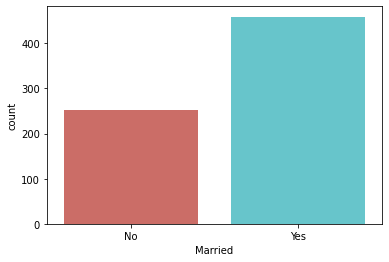

Percentage of Nor Married: 35.29%
Percentage of  Married: 64.29%
Percentage of missing value: 0.42%


In [48]:
# start your code here
married_count=loan_data.Married.value_counts(dropna=False) # count different values in 'Gender' category
print(married_count)
sns.countplot(x="Married", data=loan_data, palette="hls")
plt.show()

p_No=married_count['No']/n_record
p_Yes=married_count['Yes']/n_record
p_NaN=married_count[-1]/n_record

print('Percentage of Nor Married: {:.2f}%'.format(p_No*100))
print('Percentage of  Married: {:.2f}%'.format(p_Yes*100))
print('Percentage of missing value: {:.2f}%'.format(p_NaN*100))
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1GbYJ8nHEgGximpRJMJFwQP4bIiP-luPN)

Please make your conclusion here.

###2.4 Dependents

Please follow the same idea in section 2.2 to analyze the category 'Dependents' and make a conclusion at the end of this section.

0      404
1      120
2      111
3+      62
NaN     17
Name: Dependents, dtype: int64


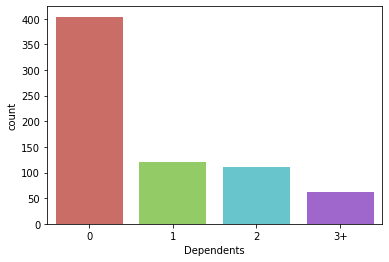

Percentage of 0 dependents: 56.58%
Percentage of  1 dependents: 16.81%
Percentage of 2 dependents: 15.55%
Percentage of 3+ dependents: 8.68%
Percentage of missig values: 2.38%


In [49]:
# start your code here
dependents_count=loan_data.Dependents.value_counts(dropna=False) # count different values in 'Gender' category
print(dependents_count)
sns.countplot(x="Dependents", data=loan_data, palette="hls")
plt.show()

p_0=dependents_count['0']/n_record
p_1=dependents_count['1']/n_record
p_2=dependents_count['2']/n_record
p_3=dependents_count['3+']/n_record
p_NaN=dependents_count[-1]/n_record


print('Percentage of 0 dependents: {:.2f}%'.format(p_0*100))
print('Percentage of  1 dependents: {:.2f}%'.format(p_1*100))
print('Percentage of 2 dependents: {:.2f}%'.format(p_2*100))
print('Percentage of 3+ dependents: {:.2f}%'.format(p_3*100))
print('Percentage of missig values: {:.2f}%'.format(p_NaN*100))
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1T05UzKCRuFpxUY4EJKzOZ-MQgFfSsR0v)

Please make your conclusion here.


### 2.5 Education

Please follow the same idea in section 2.2 to analyze the category 'Education' and make a conclusion at the end of this section.

Graduate        555
Not Graduate    159
Name: Education, dtype: int64


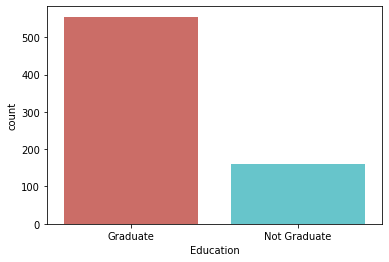

Percentage of Graduate: 77.73%
Percentage of Not Graduate: 22.27%


In [50]:
# start your code here
education_count=loan_data.Education.value_counts(dropna=False) # count different values in 'Gender' category
print(education_count)
sns.countplot(x="Education", data=loan_data, palette="hls")
plt.show()

p_graduate=education_count['Graduate']/n_record
p_notgraduate=education_count['Not Graduate']/n_record


print('Percentage of Graduate: {:.2f}%'.format(p_graduate*100))
print('Percentage of Not Graduate: {:.2f}%'.format(p_notgraduate*100))

# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1uAg12JNPRvQCVZd6tPtYfUZH9Qqs4AR5)

Please make your conclusion here.

### 2.6 Self_Employed

Please follow the same idea in section 2.2 to analyze the category 'Self_Employed' and make a conclusion at the end of this section.

No     580
Yes     95
NaN     39
Name: Self_Employed, dtype: int64


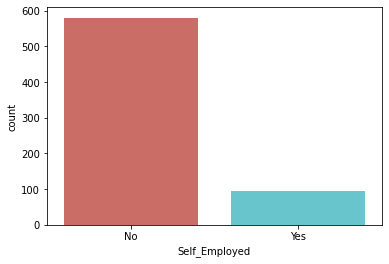

Percentage of Self-employed: 13.31%
Percentage of not Self-employed: 81.23%
Percentage of missing value: 5.46%


In [51]:
# start your code here
selfemployed_count=loan_data.Self_Employed.value_counts(dropna=False) # count different values in 'Gender' category
print(selfemployed_count)
sns.countplot(x="Self_Employed", data=loan_data, palette="hls")
plt.show()

p_Yes=selfemployed_count['Yes']/n_record
p_No=selfemployed_count['No']/n_record
p_NaN=selfemployed_count[-1]/n_record

print('Percentage of Self-employed: {:.2f}%'.format(p_Yes*100))
print('Percentage of not Self-employed: {:.2f}%'.format(p_No*100))
print('Percentage of missing value: {:.2f}%'.format(p_NaN*100))
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1SLZFuBWQpXL62a9ppu9i8An4WDruJOmi)

Please make your conclusion here.

### 2.7 Applicant income
The applicant income has a large range of values, and the previous analysis method doesn't apply well in this case. We will use histogram to characterize the distribution of the income. 

From the plot, we can see that the income of most applicants are below $10,000, and are not evenly distributed. Normalization is definitly needed for this category. 

Besides, the distribution has a thin but long right tail. We will need to treat the right tail to make the distribution more concentrated.


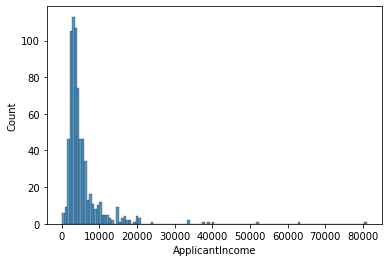

In [52]:
sns.histplot(loan_data['ApplicantIncome'])
plt.show()

### 2.8 Coapplicant income
Please use the same technique in Section 2.7 to analyze the distribution of the 'CoapplicantIncome' and give a brief discussion of it. 

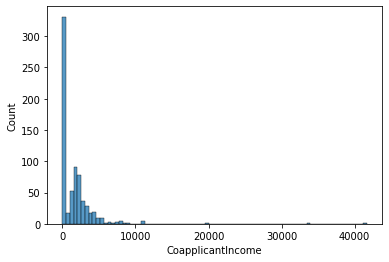

In [53]:
# start your code here
sns.histplot(loan_data['CoapplicantIncome'])
plt.show()
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1Phqf9WgoHK6OZBuLLWhb8cexvn1bzqye)

Discussion here: 

### 2.9 Loan amount

Please use the same technique in Section 2.7 to analyze the distribution of the 'LoanAmount' and give a brief discussion of it. 

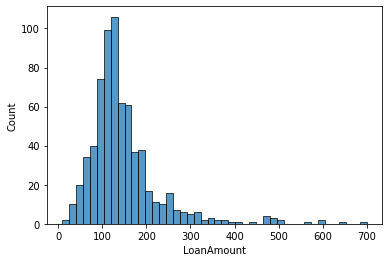

In [54]:
# start your code here
sns.histplot(loan_data['LoanAmount'])
plt.show()
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1THtXJXErj8rMLcLMVAc1GIsInRajueKG)

Discussion here: 

### 2.10 Loan_amount_term

Please use the same technique in Section 2.7 to analyze the distribution of the 'Loan_Amount_Term	' and give a brief discussion of it. 

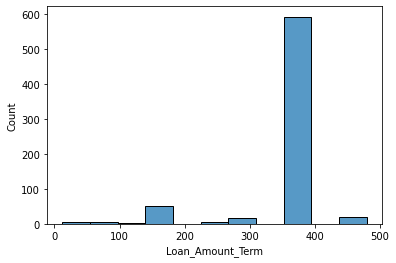

In [55]:
# start your code here
sns.histplot(loan_data['Loan_Amount_Term'])
plt.show()
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1UTKNr75TQKF626JWvAJJ6ItM_dgw3R2J)

Discussion here: 

### 2.11 Credit history

Please follow the same technique in section 2.7 to analyze the category 'Credit_History' and give a grief discusion.

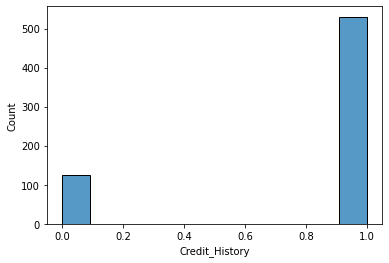

In [56]:
# start your code here
sns.histplot(loan_data['Credit_History'])
plt.show()
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1O03n_ZcFpIsr-lubli-g_IPwL6ZhGpr0)

Discussion here: 

### 2.12 Property area

Please follow the same technique in section 2.2 to analyze the category 'Property_Area' and give a grief discusion.

Semiurban    262
Urban        241
Rural        211
Name: Property_Area, dtype: int64


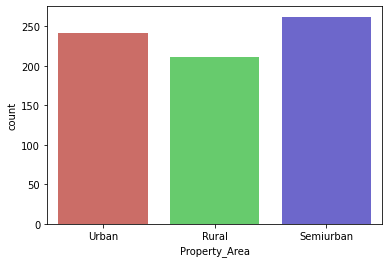

Percentage of Semiurban: 36.69%
Percentage of Urban: 33.75%
Percentage of Rural: 29.55%


In [57]:
# start your code here
propertyarea_count=loan_data.Property_Area.value_counts(dropna=False) # count different values in 'Gender' category
print(propertyarea_count)
sns.countplot(x="Property_Area", data=loan_data, palette="hls")
plt.show()

p_Semiurban=propertyarea_count['Semiurban']/n_record
p_Urban=propertyarea_count['Urban']/n_record
p_Rural=propertyarea_count['Rural']/n_record

print('Percentage of Semiurban: {:.2f}%'.format(p_Semiurban*100))
print('Percentage of Urban: {:.2f}%'.format(p_Urban*100))
print('Percentage of Rural: {:.2f}%'.format(p_Rural*100))
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1ZQ0MRWAMe4fFTn9bF-M8ttIVDlJ1kysC)

Discussion here: 

###2.13 Loan Status
Please follow the same technique in section 2.2 to analyze the category 'Loan_Status' and give a grief discusion.

Y    422
N    292
Name: Loan_Status, dtype: int64


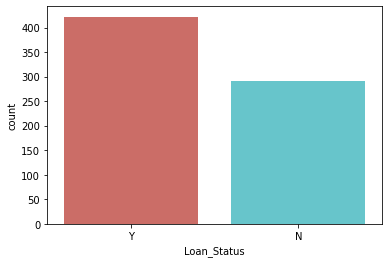

Percentage of Yes: 59.10%
Percentage of No: 40.90%


In [58]:
# start your code here
loanstatus_count=loan_data.Loan_Status.value_counts(dropna=False) # count different values in 'Gender' category
print(loanstatus_count)
sns.countplot(x="Loan_Status", data=loan_data, palette="hls")
plt.show()

p_Y=loanstatus_count['Y']/n_record
p_N=loanstatus_count['N']/n_record


print('Percentage of Yes: {:.2f}%'.format(p_Y*100))
print('Percentage of No: {:.2f}%'.format(p_N*100))

# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1KByUcd1F74SAneDWcUgj9_8Vbb-pOGz3)

Discussion here: 


## 3. Data preprocessing

### 3.1 Data imputation

In [59]:
# Checking Null Values.
loan_data.isnull().sum()

Gender               15
Married               3
Dependents           17
Education             0
Self_Employed        39
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     17
Credit_History       58
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.
We will treat the missing values in all the features one by one.
We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

There are very few missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

The imputation of 'Gender' is given. Please use the same command to fill the missing values in category 'Married', 'Dependents', 'Self_Employed', and 'Credit_History'. 

In [60]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
# start your code here
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
# end your code here

For numerical variables like LoanAmount and Loan_Amount_Term, we fill the missing values with their medians. The imputation of 'Loan_Amount_Term' is given. Please use the same command to fill the missing values in category 'LoanAmount'. 

In [61]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(),inplace = True)
# start your code here
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(),inplace = True)

# end your code here

Now, let's print out the data to see whether we fill the missing values with reasonable values. You can compare the table below with the table in the beginning to see the differences. 

In [62]:
loan_data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Please check whether all missing values are filled using the command `loan_data.isnull().sum()`. If you have all '0' entries, congratulations! You have finished the data imputation. 

In [63]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Expected output:
```
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
```

### 3.2 Converting categorical values to numbers

Let's first take a look at the data type of the loan data.

In [64]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             714 non-null    object 
 1   Married            714 non-null    object 
 2   Dependents         714 non-null    object 
 3   Education          714 non-null    object 
 4   Self_Employed      714 non-null    object 
 5   ApplicantIncome    714 non-null    int64  
 6   CoapplicantIncome  714 non-null    float64
 7   LoanAmount         714 non-null    float64
 8   Loan_Amount_Term   714 non-null    float64
 9   Credit_History     714 non-null    float64
 10  Property_Area      714 non-null    object 
 11  Loan_Status        714 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 67.1+ KB


From the information provided above, we see that the data type of 7 categories is object. We need to convert them to numbers to train our model. 

* For 'Gender' category, 'Male' is mapped to 0, 'Female' is mapped to 1.

Please use the same technique to do the following conversion. 

* For 'Married', 'Self_Employed', and 'Loan_Status' category, please map 'No' to 0 and 'Yes' to 1.

* For 'Dependents' category, please map '0' to 0, '1' to 1, '2' to 2, and '3+' to 3.

* For 'Education' category, please map 'Graduate' to 1 and 'Not Graduate' to 0.

* For 'Property_Area' category, please map 'Rural' to 0, 'Semiurban' to 1, and 'Urban' to 2.

In [65]:
# Converting the categories into numbers using map function.
loan_data['Gender'] = loan_data['Gender'].map({'Male': 0, 'Female': 1})

# start your code here
loan_data['Married'] = loan_data['Married'].map({'Yes': 1, 'No': 0})
loan_data['Dependents'] = loan_data['Dependents'].map({'0': 0, '1': 1, '2':2, '3+':3})
loan_data['Education'] = loan_data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_data['Property_Area'] = loan_data['Property_Area'].map({'Rural': 0, 'SemiUrban': 1, 'Urban':2})
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y':1 , 'N':0})
loan_data['Self_Employed'] = loan_data['Self_Employed'].map({'Yes': 1, 'No':0})
# end your code here

Now, let's double check the data types to make sure that we have all numerical entries.

In [66]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             714 non-null    int64  
 1   Married            714 non-null    int64  
 2   Dependents         714 non-null    int64  
 3   Education          714 non-null    int64  
 4   Self_Employed      714 non-null    int64  
 5   ApplicantIncome    714 non-null    int64  
 6   CoapplicantIncome  714 non-null    float64
 7   LoanAmount         714 non-null    float64
 8   Loan_Amount_Term   714 non-null    float64
 9   Credit_History     714 non-null    float64
 10  Property_Area      452 non-null    float64
 11  Loan_Status        714 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 67.1 KB


Expected output:

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
```

### 3.3 Right tail treatment
From section 2.7, 2.8, and 2.9, we see that the income of applicants, coapplicants, and the loan amount have long and thin right tail. 

It can be seen that having long and thin right tail often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove the tails from our data sets.

This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much but reduces the larger values. So, we get a distribution similar to normal distribution.
Let’s visualize the effect of log transformation.

Originally, the distribution of applicant income is as below.

![alt text](https://drive.google.com/uc?id=1UfnWuvx4SV0VLIm5cv0cR1zGteB2g199)

We will apply log transformation to the 'ApplicantIncome' category and recheck the distribution to see the difference. 

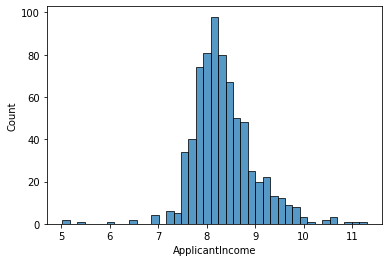

In [67]:
epsilon=1
loan_data['ApplicantIncome']=np.log(epsilon+loan_data['ApplicantIncome'])
sns.histplot(loan_data['ApplicantIncome'])
plt.show()

After the tail treatment, the distribution looks more like a normal distribution. It gives a good base for the next step: data normalization. 

Please use the same methods to treat the tails in 'CoapplicantIncome' and 'LoanAmount' category.

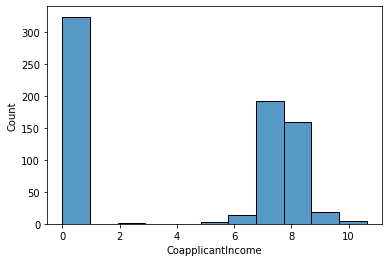

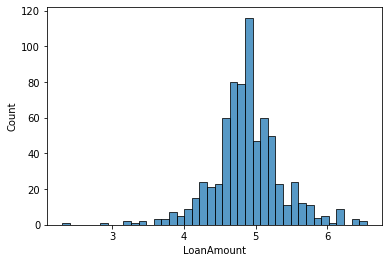

In [68]:
# start your code here
epsilon=1
loan_data['CoapplicantIncome']=np.log(epsilon+loan_data['CoapplicantIncome'])
sns.histplot(loan_data['CoapplicantIncome'])
plt.show()

loan_data['LoanAmount']=np.log(epsilon+loan_data['LoanAmount'])
sns.histplot(loan_data['LoanAmount'])
plt.show()


# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=11JyrjdzswoYkblgYxm8vvD5KssQmxkyw)

### 3.4 Other data preprocessing

We emphasized a lot that you will need to preprocess your data before using them to train your model. Now, please think about whether there are other preprocessing that you can do to help you train a good model. If yes, please do it here. 

In [69]:
# start your code here

# end your code here
loan_data.shape

(714, 12)

### 3.5 Correlation among different categories

Now let’s look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

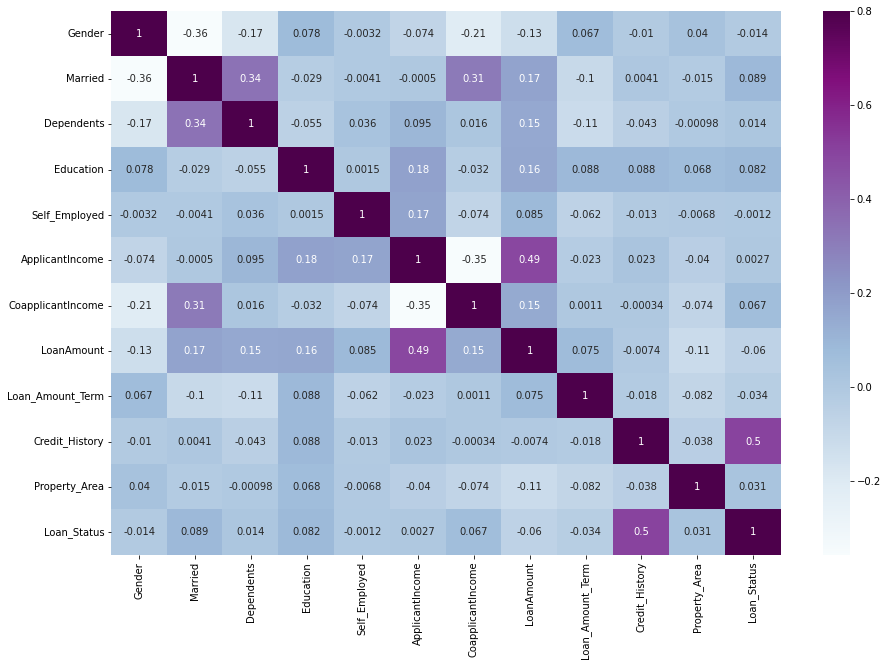

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(loan_data.corr(), vmax=.8, cmap='BuPu',annot=True, fmt='.2g')

We see a strong correlation between 'Credit_History' and 'Loan_Status', 'LoanAmount' and 'ApplicantIncome', 'CoapplicantIncome' and 'Married', a strong reverse correlation between 'ApplicantIncome' and 'CoapplicantIncom'. When we choose the categories for the training input, these are all elements that need to be considered.

### 3.6 Input and output data splitting

We need to predict the 'Loan_Status'. So, our output is 'Loan_Status'. For the input, you can choose as many  relavant categories as you like.

The output data is seperated. As neural network only accept float as the training data set, we use `np.float32` to change the data type to float. 

Please choose your input categories using the similar ideas.

In [71]:
#array = loan_data.values
Y= np.float32(loan_data[['Loan_Status']].values)
# start your code here
X = np.float32(loan_data[['Credit_History','LoanAmount', 'Education','ApplicantIncome','CoapplicantIncome']].values)
# end your code here
X.dtype
print(loan_data[['Loan_Status']])

     Loan_Status
0              1
1              0
2              1
3              1
4              1
..           ...
709            0
710            0
711            0
712            0
713            0

[714 rows x 1 columns]


Expected output:
```
dtype('float32')
```

### 3.7 Training and testing data splitting

In our lecture, we mentioned that if you have a small dataset (<2000 samples). It is suggested to use 20% of it for testing purpose. It can be easily realized using sklearn library. 


In [72]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=1234)

## 4 Building Neural network

Please use what we learned before to build your neural network. You have the freedome to choose your network structure. Just keep it in mind that the number of neurons in the input layer and the output layer should be the same as the size of your input and output data for each sample. Besides, since this is a binary classification problem, the activation function in the output layer needs to be 'sigmoid' function. 

In [73]:
import tensorflow as tf

# start your code here
Loanstat_model=tf.keras.Sequential([
    #Input layer                      
    tf.keras.layers.Input(shape=(5)), # Set how many elements are there in every training image?

    #Start adding hidden layers  
    tf.keras.layers.Dense(30, activation='relu',
                          kernel_initializer='glorot_uniform',# we will randomly choose the initial weight using the 'glorot_uniform' method as the activation function
                          bias_initializer='he_normal', # we will initialize all bias to be truncated normal distribution centered on 0 
                          #kernel_regularizer=tf.keras.regularizers.L1L2(0.01)
                          ),
                         # tf.keras.layers.Dropout(0.01),
                           # Please set your neuron numbers, activation function and so on. 
    tf.keras.layers.Dense(20, activation='relu',
                          kernel_initializer='glorot_uniform',# we will randomly choose the initial weight using the 'glorot_uniform' method as the activation function
                          bias_initializer='he_normal', # we will initialize all bias to beto be truncated normal distribution centered on 0 
                          ),
                          #tf.keras.layers.Dropout(0.01),
   tf.keras.layers.Dense(10, activation='relu',
                          kernel_initializer='glorot_uniform',# we will randomly choose the initial weight using the 'glorot_uniform' method as the activation function
                          bias_initializer='he_normal', # we will initialize to be truncated normal distribution centered on 0 .
                         kernel_regularizer=tf.keras.regularizers.L2(0.01)),
                       #  tf.keras.layers.Dropout(0.01),
 # tf.keras.layers.Dense(10, activation='relu',
                      #    kernel_initializer='he_uniform',# we will randomly choose the initial weight using the 'glorot_uniform' method as the activation function
                         #bias_initializer='he_normal', # we will initialize all bias to be to be truncated normal distribution centered on 0 .
                        # kernel_regularizer=tf.keras.regularizers.L2(0.01)),
                         # tf.keras.layers.Dropout(0.01),
    #please feel free to add more hidden layers here. 
    
    #please follow the example of layer 1 to add more hidden layers here. 

    # End adding hidden layers                    
    tf.keras.layers.Dense(1,activation='sigmoid')# how many elements are there in every training output
            #kernel_initializer='he_uniform',# we will randomly choose the initial weight using the 'glorot_uniform' method as the activation function
                         #bias_initializer='he_normal', # we will initialize all bias to be zeros.
                         # kernel_regularizer=tf.keras.regularizers.L2(0.01))               
])

# end your code here
Loanstat_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                180       
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________


## 5. Compiling and training your neural network
Please use what you learned before to compile and train your neural network. 

In [74]:
# start your code here
Loanstat_model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),  
              loss= tf.keras.losses.BinaryFocalCrossentropy(), 
              # List of metrics to monitor
              metrics=['accuracy'],
                 )

history = Loanstat_model.fit(
    x_train , #  training input data
    y_train, # training output data
   validation_split=0.30,
    batch_size=20, # how many samples (points) do you want to use to update weights once? 
    epochs=500 # how many iterations do you want to train your model? 
)
#end your code here

Epoch 1/500
20/20 [==============================] - 1s 12ms/step - loss: 0.3733 - accuracy: 0.4361 - val_loss: 0.3178 - val_accuracy: 0.4360
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: 0.2938 - accuracy: 0.5063 - val_loss: 0.2912 - val_accuracy: 0.4651
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 0.2727 - accuracy: 0.5990 - val_loss: 0.2775 - val_accuracy: 0.5698
Epoch 4/500
20/20 [==============================] - 0s 5ms/step - loss: 0.2607 - accuracy: 0.6040 - val_loss: 0.2651 - val_accuracy: 0.5465
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.2507 - accuracy: 0.6015 - val_loss: 0.2543 - val_accuracy: 0.5465
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.6040 - val_loss: 0.2456 - val_accuracy: 0.5465
Epoch 7/500
20/20 [==============================] - 0s 5ms/step - loss: 0.2354 - accuracy: 0.5965 - val_loss: 0.2389 - val_accuracy: 0.5407
Epoch 8/500


Let's take a look at the training history. You probably will need to adjust the parameters like learning rate, batch size, epochs, or even your NN structure. 

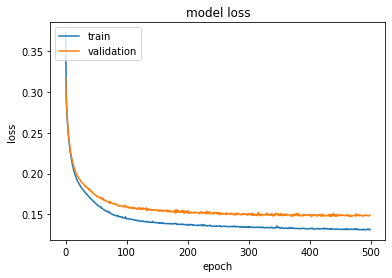

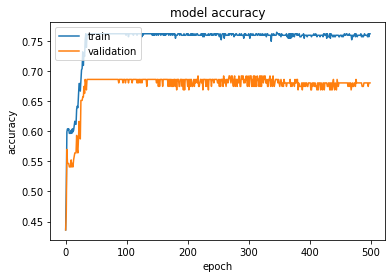

5/5 [==============================] - 0s 3ms/step - loss: 0.1427 - accuracy: 0.7832


[0.14269867539405823, 0.7832167744636536]

In [75]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
Loanstat_model.evaluate(x_test,y_test)

After several adjustion, the results may be still unsatisfying. In this case you will need to take a closer look at your prediction and the true value to see where the problems are. Please manually examine what the mistakes are, and use the technique we learned in the most recent 2 weeks to make some synthetic data to help improve your accuracy in Section 3.4. As a reference, the best accuracy that I can find online using NN is 80%. I was able to improve it to 82.5%. See how accurate you can achieve. 

In [76]:
# Getting predictions for the test set
output = Loanstat_model.predict(x_test)
threshold=0.5
y_pred = np.where(output>=threshold,1,0)
print((y_pred==y_test).sum()/len(y_test))
#Getting accuracy score
for i in range(len(x_test)):
  if y_pred[i,:]<y_test[i,:]:
    print(y_test[i,:],y_pred[i,:],output[i,:], x_test[i,:])
  if y_pred[i,:]>y_test[i,:]:
   print(y_test[i,:],y_pred[i,:],output[i,:], x_test[i,:])

0.7832167832167832
[0.] [1] [0.59747493] [1.        4.7095304 1.        6.908755  8.014005 ]
[1.] [0] [0.2301417] [0.        5.081404  1.        8.374247  7.5021863]
[0.] [1] [0.59767425] [1.       5.420535 1.       9.210441 7.418781]
[0.] [1] [0.6077304] [1.        5.2257466 1.        8.451908  7.557995 ]
[0.] [1] [0.53518593] [1.        4.8598123 0.        7.6014023 0.       ]
[1.] [0] [0.15834229] [ 0.        6.398595  1.       10.596635  0.      ]
[0.] [1] [0.61027366] [1.        5.0238805 1.        8.220942  7.9813914]
[0.] [1] [0.60721856] [1.        3.583519  0.        7.2744794 0.       ]
[0.] [1] [0.6067728] [1.       4.394449 1.       8.188967 0.      ]
[0.] [1] [0.5923232] [1.       5.583496 1.       8.699681 7.71913 ]
[0.] [1] [0.63070905] [1.        3.8501475 1.        7.7744355 0.       ]
[0.] [1] [0.6095787] [1.       4.317488 1.       8.060856 0.      ]
[0.] [1] [0.6067106] [1.       5.170484 1.       8.62497  7.669962]
[0.] [1] [0.6113767] [1.       4.276666 1.       8